In [1]:
from src.pipelines import get_pipeline, get_data_preparation_pipeline
from src.loaders.data_loader import get_train_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
import matplotlib.pyplot as plt
import joblib
%matplotlib inline

In [2]:
X, y = get_train_data(sample_size=0.005)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
pipeline = get_pipeline()
pipeline = pipeline.fit(X_train, y_train)

joblib.dump(pipeline,"model.joblib")

Model performance
[[0.36878795 0.63121205]
 [0.28275401 0.71724599]]


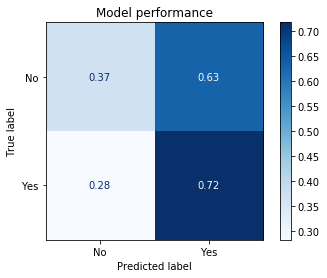

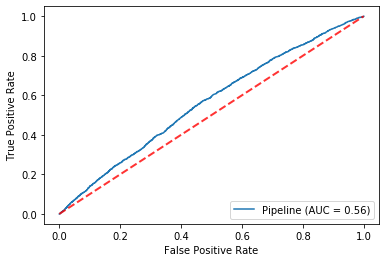

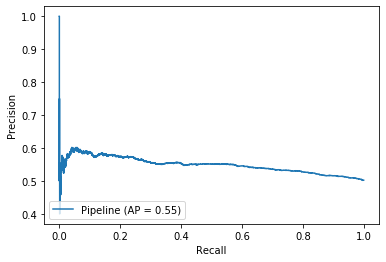

In [10]:
class_names = ["No","Yes"]
disp = plot_confusion_matrix(pipeline, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true')

disp.ax_.set_title("Model performance")

print("Model performance")
print(disp.confusion_matrix)
plot_roc_curve(pipeline, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
plt.show()
plot_precision_recall_curve(pipeline, X_test, y_test)

In [12]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
    
f_importances(pipeline.coef_, features_names=["Y","X","Z"])

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [ ]:
pipeline.pic

In [3]:
preparation_pipeline = get_data_preparation_pipeline()
X_transformed = preparation_pipeline.fit_transform(X_train, y_train)

AttributeError: head not found

In [6]:
X_transformed.shape
X_transformed.plot()

AttributeError: plot not found